# LIBRARIES

In [275]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [276]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [277]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [278]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [279]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [280]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [281]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# IMPORTING DATA 

In [282]:
data_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)

C:\Users\user\AppData\Local\Temp\ipykernel_15396\2969852544.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)


# EXPLORING DATA 

In [283]:
data_raw.shape

(466285, 74)

In [284]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [285]:
data_raw.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
175565,2896500,3528887,11000,11000,11000.0,36 months,14.33,377.72,C,C1,FedEx Express,7 years,OWN,40600.0,Verified,Jan-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,bill payoff,874xx,NM,31.45,0.0,Mar-04,0.0,NaN,110.0,9.0,1.0,8895,59.7,13.0,w,0.0,0.0,13601.9802,13601.98,11000.0,2601.98,0.0,0.0,0.0,Jan-16,377.7,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,61.0,51204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14900.0,NaN,NaN,NaN


In [286]:
data_raw.id.nunique()

466285

In [287]:
data_raw.member_id.nunique()

466285

Terlihat bahwa tidak ada `id` atau `member_id` yang duplikat, artinya setiap baris sudah mewakili satu individu.

Selanjutnya, pembuangan fitur-fitur yang tidak berguna dilakukan. Contohnya seperti fitur yang merupakan id unik, berupa free text, nilainya kosong semua (NULL), dsb.

In [288]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [289]:
data = data_raw.drop(cols_to_drop, axis=1)

In [290]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
208368,3725,3725,3725.0,36 months,7.90,116.56,A,Pulmuone Foods,1 year,MORTGAGE,34000.0,Verified,Jul-12,Fully Paid,n,credit_card,emergency credit,CA,16.34,0.0,Mar-97,0.0,NaN,NaN,11.0,0.0,21231,59.1,24.0,f,0.0,0.0,4195.206687,4195.21,3725.0,470.21,0.0,0.0,0.0,Jul-15,120.55,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
164797,6000,6000,6000.0,36 months,14.09,205.33,B,ICW Group,5 years,RENT,85000.0,Not Verified,Feb-13,Fully Paid,n,major_purchase,Boat,CA,21.08,0.0,Oct-07,2.0,NaN,NaN,6.0,0.0,6044,67.2,11.0,f,0.0,0.0,6735.880000,6735.88,6000.0,735.88,0.0,0.0,0.0,Feb-14,4483.20,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,63751.0,9000.0
3873,23000,23000,23000.0,36 months,11.71,760.75,B,Healthcare Resource Group,3 years,RENT,56544.0,Verified,Nov-11,Fully Paid,n,debt_consolidation,Consolidation loan,WA,19.86,0.0,Dec-93,1.0,NaN,NaN,7.0,0.0,18112,83.5,25.0,f,0.0,0.0,27373.300060,27373.30,23000.0,4373.30,0.0,0.0,0.0,Dec-14,786.84,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
115307,35000,35000,35000.0,36 months,17.56,1257.63,D,Cabrera Contracting,8 years,RENT,85000.0,Verified,Aug-13,Fully Paid,n,house,house loan,CA,29.97,0.0,Mar-98,0.0,NaN,NaN,11.0,0.0,13878,87.3,13.0,f,0.0,0.0,38779.436800,38779.44,35000.0,3779.44,0.0,0.0,0.0,Apr-14,29984.73,NaN,Dec-14,0.0,NaN,1,INDIVIDUAL,0.0,0.0,39796.0,15900.0
138917,35000,35000,35000.0,60 months,21.49,956.55,E,Express Scripts,3 years,MORTGAGE,85000.0,Verified,May-13,Fully Paid,n,debt_consolidation,Credit Consolidation,NJ,23.77,0.0,Dec-00,0.0,44.0,NaN,19.0,0.0,30901,78.4,35.0,f,0.0,0.0,44775.228270,44775.23,35000.0,9775.23,0.0,0.0,0.0,Oct-14,29471.15,NaN,Nov-14,0.0,63.0,1,INDIVIDUAL,0.0,0.0,312451.0,39400.0


# DEFINE TARGET VARIABLE / LABELING

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut. 

Dalam dataset ini, variabel `loan_status` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [291]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan `bad loan` (peminjam yang buruk) atau `good loan` (peminjam yang baik)

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran di atas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan.

In [292]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [293]:
data['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

Setelah melakukan flagging terhadap bad/good loan, dapat dilihat bahwa jumlah individu yang ditandai sebagai bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan problem ini menjadi problem imbalanced dataset.

Jangan lupa untuk membuang kolom asal `loan_status` 

In [294]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

### emp_length

Memodifikasi `emp_length`. Contoh: 4 years -> 4

In [295]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [296]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

C:\Users\user\AppData\Local\Temp\ipykernel_15396\1742887160.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')


In [297]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [298]:
data.drop('emp_length', axis=1, inplace=True)

### term

Memodifikasi `term`. Contoh: 36 months -> 36

In [299]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [300]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [301]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [302]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [303]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [304]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [305]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh, yaitu negatif.

In [306]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [307]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [308]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [309]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [310]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [311]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [312]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [313]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [314]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [315]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [316]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [317]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [318]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [319]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [320]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

### Correlation Check

C:\Users\user\AppData\Local\Temp\ipykernel_15396\594547999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

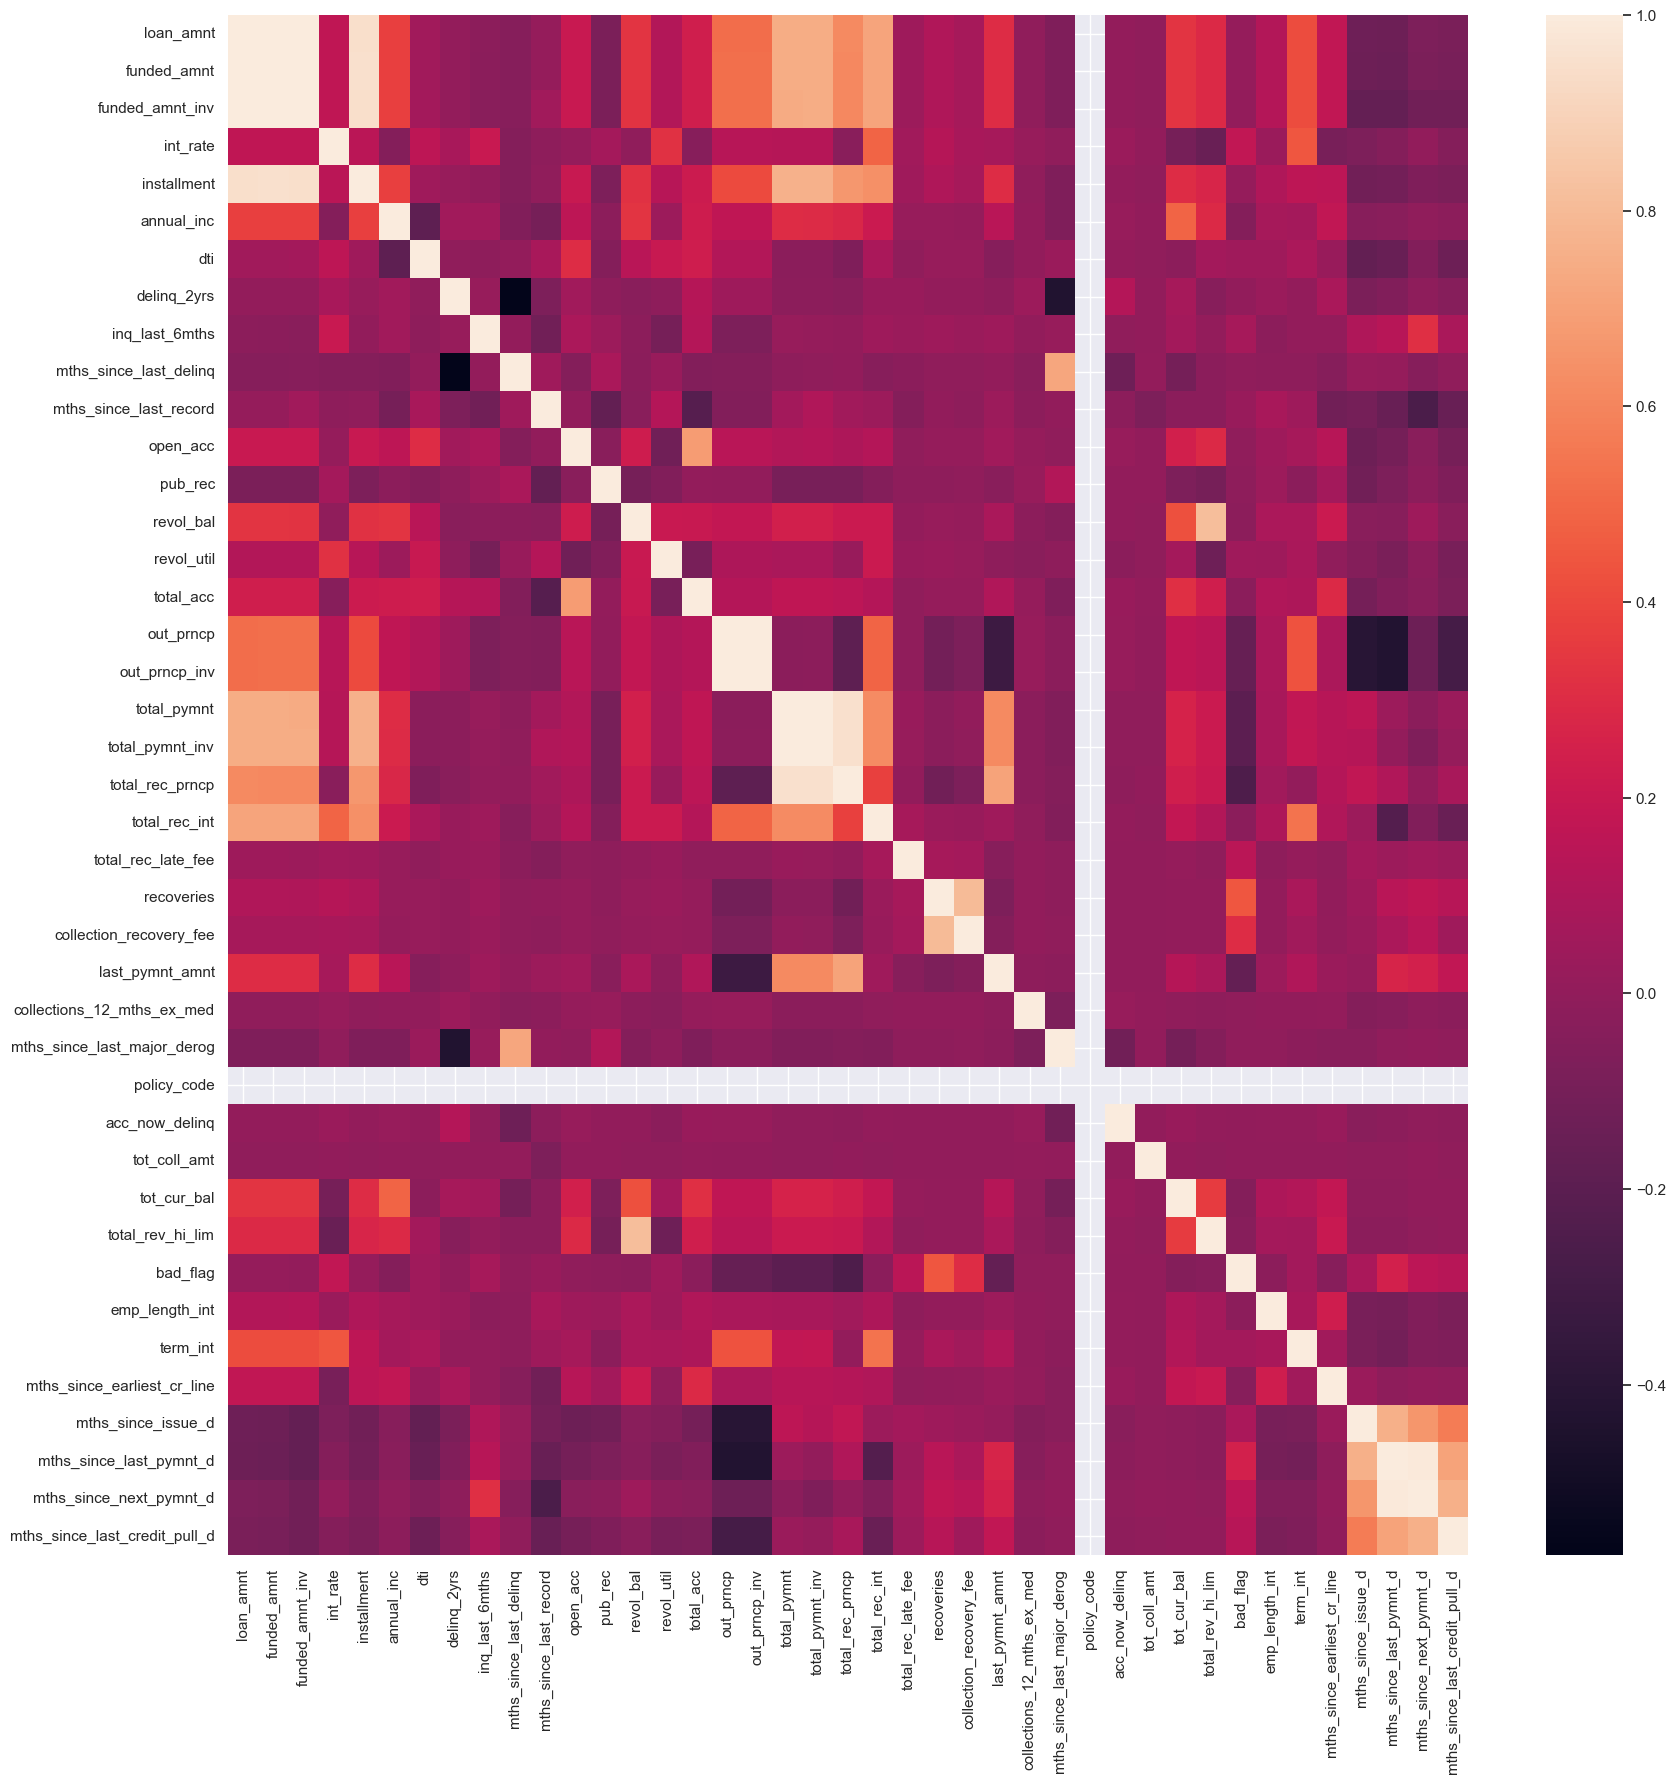

In [321]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [322]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\user\AppData\Local\Temp\ipykernel_15396\2288160448.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()


In [323]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [324]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [325]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [326]:
data.drop(['emp_title', 'title', 'application_type','initial_list_status'], axis=1, inplace=True)

In [327]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

Ternyata, pada tipe data selain `object` juga terdapat fitur yang hanya memiliki satu nilai unik saja maka akan ikut dibuang juga. nilai nilai fitur tinggi yang terdapat diatas tidak dibuang karena penting untuk pemodelan

In [328]:
data.drop(['policy_code'], axis=1, inplace=True)

In [329]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [330]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

### Missing Value Checking

In [331]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

Di sini, kolom-kolom dengan missing values di atas 75% dibuang

In [332]:
fordrop = check_missing[check_missing > 75]
print(fordrop)

mths_since_last_record    86.566585
dtype: float64


In [333]:
data.drop(fordrop.index, axis=1, inplace=True)

### Missing Values Filling

In [334]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

### cek missing value

In [335]:
data.isnull().sum()

loan_amnt                      0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
bad_flag                       0
emp_length_int                 0
term_int                       0
mths_since_earliest_cr_line    0
mths_since_issue_d             0
dtype: int64

pastikan semua missing value hilang dengan cara hapus baris yang terdapat missing value.

In [336]:
data.dropna(axis = 0,inplace=True)

In [337]:
data.isnull().sum() # cek kembali missing value

loan_amnt                      0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
bad_flag                       0
emp_length_int                 0
term_int                       0
mths_since_earliest_cr_line    0
mths_since_issue_d             0
dtype: int64

In [338]:
data.sample(5)

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
174087,15000,12.12,B,MORTGAGE,68000.0,Verified,debt_consolidation,CA,19.69,0.0,1.0,-1.0,10.0,0.0,14750,93.9,23.0,0.00,0.0,909.38,0.0,0.0,0.0,263944.0,1,5.0,36.0,254.0,59.0
184614,6400,12.12,B,MORTGAGE,76960.0,Verified,medical,MT,28.38,4.0,0.0,13.0,9.0,0.0,3913,64.1,36.0,0.00,0.0,0.00,0.0,0.0,0.0,211288.0,0,10.0,36.0,336.0,61.0
225903,8400,6.62,A,MORTGAGE,70000.0,Verified,car,NY,17.73,0.0,0.0,-1.0,6.0,0.0,11289,41.5,11.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,3.0,36.0,266.0,69.0
45276,12375,14.47,C,RENT,52100.0,Source Verified,debt_consolidation,IL,9.65,0.0,2.0,-1.0,7.0,0.0,5023,37.0,8.0,4730.39,0.0,0.00,0.0,0.0,0.0,7116.0,0,8.0,36.0,566.0,48.0
230123,3200,17.58,D,MORTGAGE,60000.0,Not Verified,credit_card,NJ,18.48,0.0,2.0,29.0,11.0,0.0,14455,95.7,20.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,3.0,36.0,247.0,71.0


# Visual Analysis

### Loan amount distribution

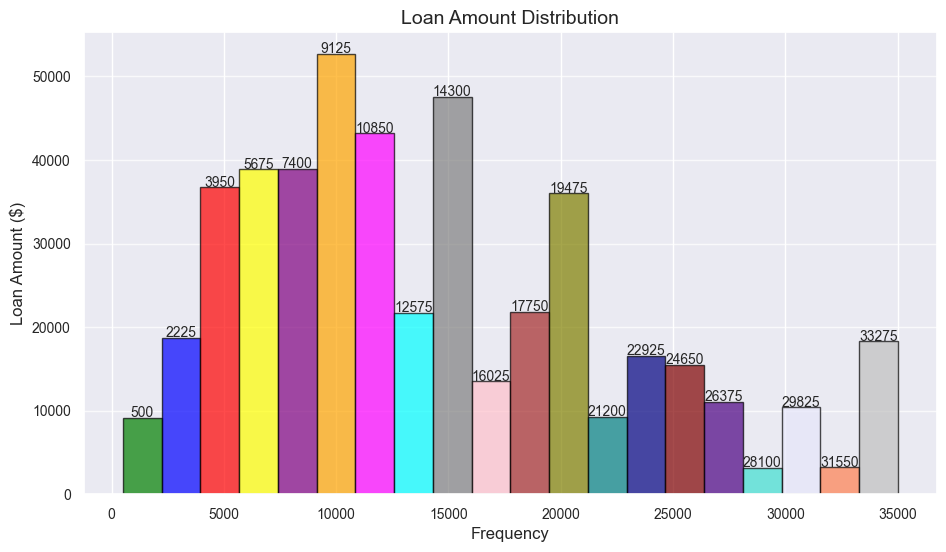

In [339]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
n, bins, patches = plt.hist(data['loan_amnt'], bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)
plt.title('Loan Amount Distribution', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)

colors = ['green', 'blue', 'red', 'yellow', 'purple', 'orange', 'magenta', 'cyan', 'grey', 'pink', 'brown', 'olive', 'teal', 'navy', 'maroon', 'indigo', 'turquoise', 'lavender', 'coral', 'silver']

for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

    plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+100, s=int(bins[i]), ha='center', fontsize=10)

plt.show()


loan amount distribution. pada hasil visualisasi diatas didapatkan insight bahwa pinjaman 9125$ memiliki frequensi tertinggi sedangkan 28100 dan 31550 memiliki frekuensi peminjaman paling sedikit.

### Distribution of credit grades

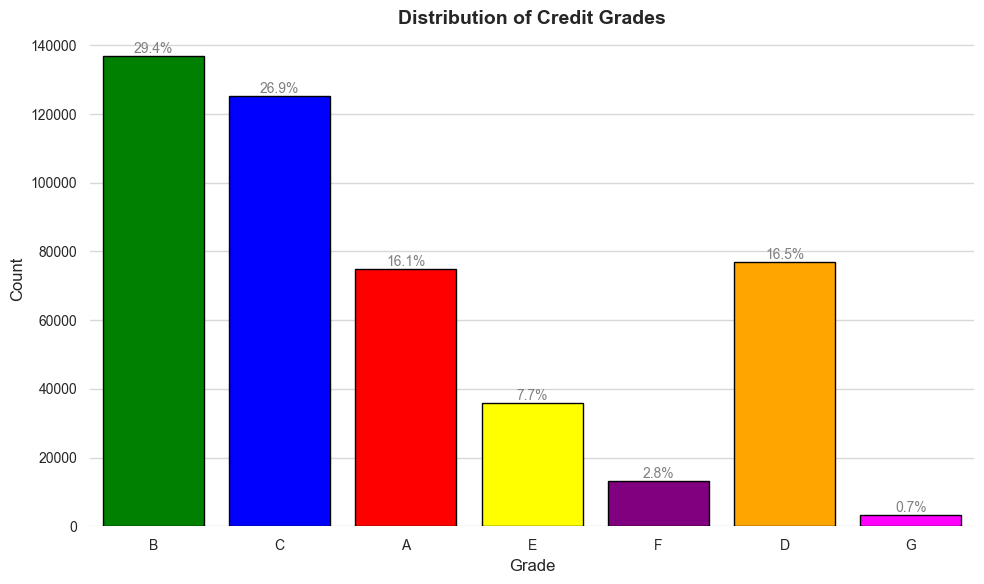

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='grade', data=data, palette=colors, edgecolor='black')

plt.xlabel('Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Credit Grades', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)

for p, c in zip(ax.patches, colors):
    plt.setp(p, facecolor=c)
    ax.annotate('{:.1f}%'.format(p.get_height()/len(data)*100),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Dari visualisasi tersebut, dapat dilihat bahwa sebagian besar peminjam memiliki kredit dengan grade yang baik, yaitu di antara A hingga D. Grade B memiliki jumlah peminjam terbanyak dibandingkan dengan grade lainnya, diikuti oleh grade C dan A. Sementara itu, grade G memiliki jumlah peminjam yang paling sedikit.

Dapat dilihat bahwa grade A berada pada posisi keempat tertinggi dari jumlah peminjam, meskipun masih cukup jauh dari grade B, C, dan D yang menjadi grade dengan jumlah peminjam terbanyak. Hal ini menunjukkan bahwa sebagian besar peminjam memiliki kualitas kredit yang baik, tetapi masih ada sebagian kecil yang memiliki risiko kredit yang lebih tinggi, terutama di grade E hingga G.

### Distribution of home ownership

In [341]:
print(data['home_ownership'].value_counts())

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64


any dan other gabung saja

In [342]:
data['home_ownership'] = data['home_ownership'].replace(['ANY', 'OTHER'], 'OTHER') 

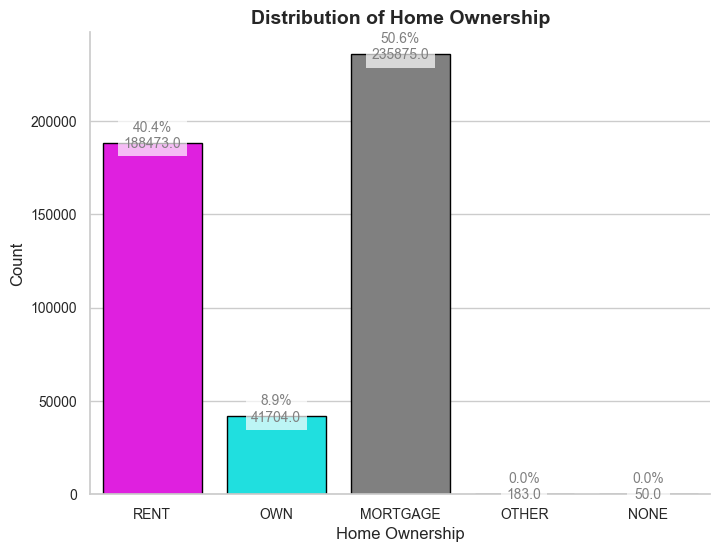

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
colors = ['magenta', 'cyan', 'grey', 'pink', 'brown']

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='home_ownership', data=data, palette=colors, edgecolor='black', ax=ax)

plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Home Ownership', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for p in ax.patches:
    ax.annotate('{:.1f}%\n{}'.format(100*p.get_height()/len(data), p.get_height()),
    (p.get_x()+p.get_width()/2., p.get_height()),
    ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
    textcoords='offset points', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

Dari visualisasi distribusi kepemilikan rumah di antara peminjam, dapat dilihat bahwa kategori 'MORTGAGE' memiliki jumlah peminjam terbanyak, diikuti oleh kategori 'RENT', dan kategori 'OWN'. Sedangkan kategori 'OTHER' dan 'NONE' memiliki jumlah peminjam yang sangat sedikit, bahkan mendekati nol persen.

Hal ini menunjukkan bahwa mayoritas peminjam dalam dataset ini memiliki kepemilikan rumah melalui kredit hipotek (mortgage) atau menyewa rumah (rent). Dalam perspektif risiko kredit, dapat dianggap bahwa peminjam dengan kepemilikan rumah melalui kredit hipotek memiliki tingkat risiko yang lebih rendah dibandingkan dengan peminjam yang menyewa rumah atau tidak memiliki rumah, karena memiliki tanggung jawab finansial yang lebih besar dan stabil

### Loan purpose distribution

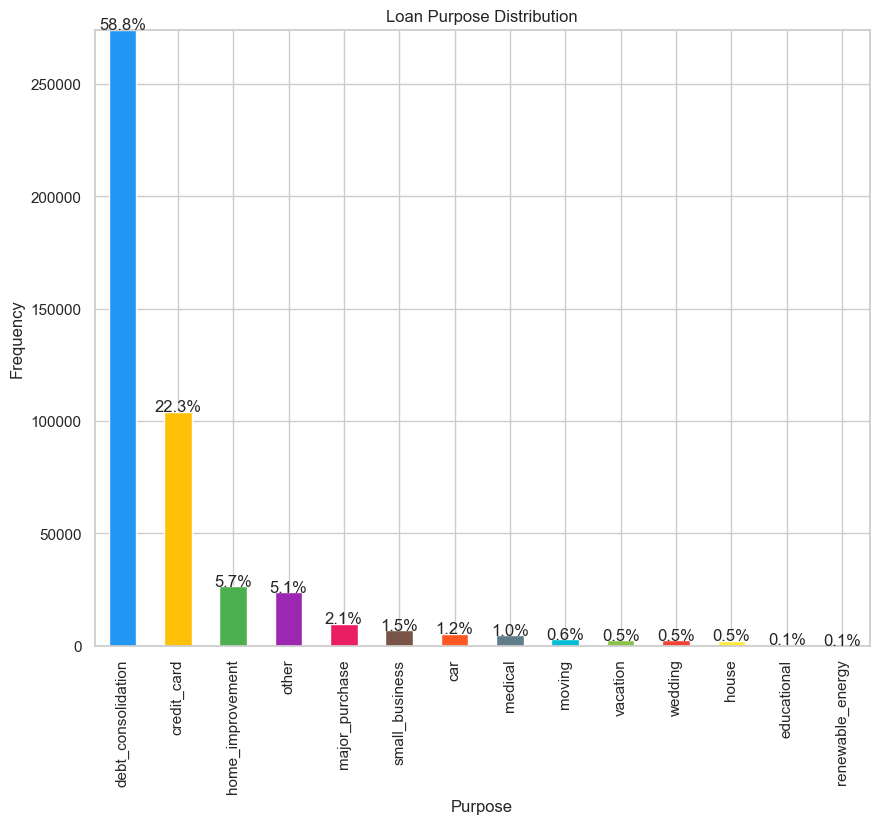

In [344]:
import matplotlib.pyplot as plt

# Menghitung frekuensi setiap kategori pada variabel purpose
purpose_counts = data['purpose'].value_counts()

# Membuat bar plot
fig, ax = plt.subplots(figsize=(10, 8))
purpose_counts.plot(kind='bar', color=['#2196F3', '#FFC107', '#4CAF50', '#9C27B0', '#E91E63', '#795548',
                                       '#FF5722', '#607D8B', '#00BCD4', '#8BC34A', '#F44336', '#FFEB3B', '#CDDC39', '#FF9800'], ax=ax)

# Menambahkan persentase pada setiap bar
total = len(data)
for i, v in enumerate(purpose_counts):
    ax.text(i, v + 50, f'{(v/total*100):.1f}%', ha='center')

# Menambahkan judul dan label sumbu
ax.set_title('Loan Purpose Distribution')
ax.set_xlabel('Purpose')
ax.set_ylabel('Frequency')

# Mengatur margin pada sumbu x agar tidak terpotong
plt.margins(0.03, 0)

# Menampilkan plot
plt.show()


Dari hasil visualisasi bar chart jumlah pinjaman berdasarkan tujuan, dapat disimpulkan bahwa tujuan pinjaman yang paling banyak adalah untuk debt consolidation, yang artinya pengguna pinjaman menggunakan pinjaman untuk melunasi hutang-hutang yang ada. Tujuan pinjaman kedua yang paling banyak adalah untuk credit card, yang artinya pengguna pinjaman menggunakan pinjaman untuk membayar tagihan kartu kredit. Tujuan pinjaman ketiga yang paling banyak adalah untuk home improvement, yang artinya pengguna pinjaman menggunakan pinjaman untuk melakukan perbaikan atau renovasi rumah. Tujuan pinjaman lainnya seperti other, major purpose, small business, car, medical, moving, vacation, wedding, house, educational, dan renewable energy memiliki jumlah pinjaman yang lebih sedikit dibandingkan tiga tujuan pinjaman teratas.

Dengan mengetahui tujuan pinjaman yang paling banyak, pihak kreditur dapat membuat strategi pemasaran yang lebih efektif untuk menarik lebih banyak peminjam dengan menawarkan produk dan layanan yang sesuai dengan kebutuhan mereka. Selain itu, pihak kreditur juga dapat menyesuaikan syarat dan ketentuan pinjaman yang ditawarkan agar lebih cocok dengan tujuan penggunaan pinjaman. Dalam hal ini, analisis visual dapat membantu dalam pengambilan keputusan dan membuat strategi bisnis yang lebih efektif.

### Histogram of dti

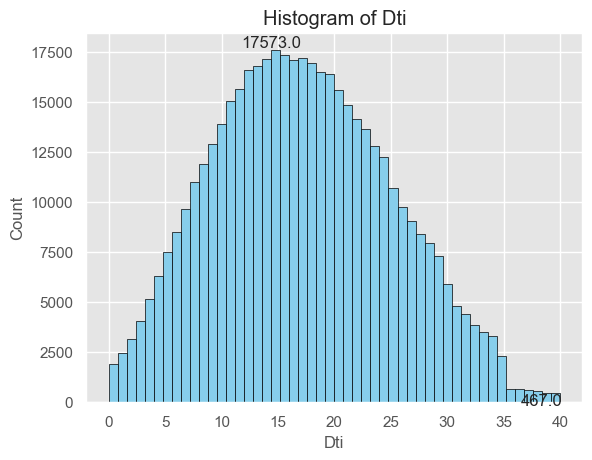

In [345]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')

# Visualize Dti using histogram
n, bins, patches = plt.hist(data['dti'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Dti')
plt.ylabel('Count')
plt.title('Histogram of Dti')

# Add text for highest bar
index_max = n.argmax()
plt.text(bins[index_max], n[index_max], f'{n[index_max]}', ha='center', va='bottom', fontsize=12)

# Add text for lowest bar
index_min = n.argmin()
plt.text(bins[index_min], n[index_min], f'{n[index_min]}', ha='center', va='top', fontsize=12)

plt.show()


Berdasarkan informasi bahwa nilai tertinggi pada DTI adalah 17573 dengan nilai DTI 15, sementara nilai terendah adalah 467 dengan nilai DTI 40, dapat disimpulkan bahwa terdapat pola kenaikan dan penurunan pada nilai DTI. Pada rentang nilai DTI antara 0 hingga 15, jumlah peminjam dengan rasio utang terhadap pendapatan yang lebih rendah lebih banyak dibandingkan dengan peminjam dengan rasio utang terhadap pendapatan yang lebih tinggi. Hal ini dapat mengindikasikan bahwa pada rentang nilai DTI ini, peminjam memiliki kemampuan yang lebih baik dalam membayar cicilan utang mereka.

Namun, pada rentang nilai DTI antara 16 hingga 40, terdapat penurunan jumlah peminjam dengan rasio utang terhadap pendapatan yang lebih rendah dan peningkatan jumlah peminjam dengan rasio utang terhadap pendapatan yang lebih tinggi. Hal ini dapat mengindikasikan bahwa pada rentang nilai DTI ini, peminjam memiliki kemampuan yang lebih rendah dalam membayar cicilan utang mereka.

### Distribution of bad flag

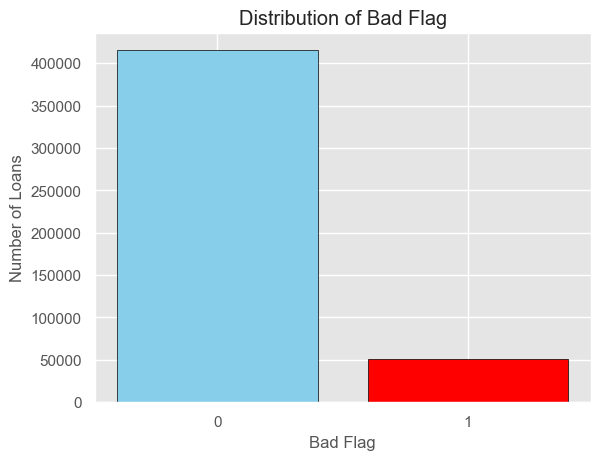

In [346]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')

# Count the number of loans in each category
bad_flag_count = data['bad_flag'].value_counts()

# Create a bar plot
plt.bar(bad_flag_count.index.astype(str), bad_flag_count.values, color=['skyblue','red'], edgecolor='black')

# Set the title and axis labels
plt.title('Distribution of Bad Flag')
plt.xlabel('Bad Flag')
plt.ylabel('Number of Loans')

# Display the plot
plt.show()


Dari distribusi variabel bad_flag yang dapat divisualisasikan dalam bentuk bar plot, jika terdapat ketimpangan antara jumlah pinjaman yang dianggap bermasalah dan tidak, dapat diinterpretasikan sebagai adanya ketidakseimbangan pada data. Ketidakseimbangan pada data ini bisa menjadi masalah dalam analisis data karena model yang dibangun dapat cenderung lebih banyak memprediksi hasil yang dominan (misalnya, model dapat cenderung memprediksi bahwa semua pinjaman akan baik-baik saja). Hal ini dapat menghasilkan kinerja model yang buruk dalam memprediksi kasus yang tidak dominan (dalam kasus ini, kasus pinjaman yang dianggap bermasalah).

Oleh karena itu, jika terdapat ketidakseimbangan pada data, maka biasanya perlu dilakukan teknik pengolahan data khusus seperti oversampling atau undersampling untuk mengatasi masalah tersebut dan meningkatkan kinerja model dalam memprediksi kasus minoritas.

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding.

In [347]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [348]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [349]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [350]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [351]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [352]:
data

,loan_amnt,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,10.65,B,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,10.0,36.0,395.0,72.0
1,2500,15.27,C,RENT,30000.0,Source Verified,car,GA,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,0.00,0.00,117.08,0.0,0.0,0.0,0.0,1,0.0,60.0,224.0,72.0
2,2400,15.96,C,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,10.0,36.0,193.0,72.0
3,10000,13.49,C,RENT,49200.0,Source Verified,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0.00,16.97,0.00,0.0,0.0,0.0,0.0,0,10.0,36.0,262.0,72.0
4,3000,12.69,B,RENT,80000.0,Source Verified,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,766.90,0.00,0.00,0.0,0.0,0.0,0.0,0,1.0,60.0,263.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,14.47,C,MORTGAGE,110000.0,Source Verified,debt_consolidation,TX,19.85,0.0,2.0,-1.0,18.0,0.0,23208,77.6,36.0,12574.00,0.00,0.00,0.0,0.0,0.0,294998.0,0,4.0,60.0,176.0,47.0
466281,22000,19.97,D,MORTGAGE,78000.0,Verified,debt_consolidation,TN,18.45,0.0,5.0,-1.0,18.0,1.0,18238,46.3,30.0,0.00,0.00,0.00,0.0,0.0,0.0,221830.0,1,10.0,60.0,246.0,47.0
466282,20700,16.99,D,MORTGAGE,46000.0,Verified,debt_consolidation,OH,25.65,0.0,2.0,65.0,18.0,0.0,6688,51.1,43.0,14428.31,0.00,0.00,0.0,0.0,0.0,73598.0,0,7.0,60.0,192.0,47.0
466283,2000,7.90,A,OWN,83000.0,Verified,credit_card,CA,5.39,3.0,1.0,13.0,21.0,0.0,11404,21.5,27.0,0.00,0.00,0.00,0.0,0.0,0.0,591610.0,0,3.0,36.0,178.0,47.0


In [353]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi 

In [354]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

In [355]:
data_model.sample(5)

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,bad_flag
262230,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.495954,-0.038837,0.828783,-0.999700,-0.357012,-0.737182,-0.708792,-1.240215,7.515832,-0.018098,1.024888,-1.384557,2.198722,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.539844,0.073665,-0.616225,-0.917802,-0.994076,0
39066,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.279645,-0.353232,0.304251,-1.071028,-0.357012,0.178920,-0.708792,0.363587,-0.314290,-0.035993,-0.969024,-1.039773,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-0.725040,-0.616225,-0.559332,4.584671,0
397690,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.521001,-0.041132,-0.509238,0.424302,0.897154,-0.737182,0.032409,0.965013,-0.314290,0.236204,-0.645118,-0.177811,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.496198,1.138605,-0.616225,0.608586,-0.575670,0
169788,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.651206,0.339813,0.595354,-0.345016,-0.357012,0.178920,-0.708792,0.564063,-0.314290,0.547817,0.011106,0.511757,-0.693944,-0.123464,6.372776,-0.083608,-0.058307,-0.012089,0.595011,1.138605,1.622784,-0.316498,0.470345,1
233011,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.521001,1.872774,-0.205180,0.296931,3.405486,0.178920,0.294010,-0.638789,-0.314290,-0.507017,-0.670358,0.511757,0.667223,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,0.268679,1.138605,1.622784,0.562332,-1.063810,0


# MODELING

### Train-Test Split

In [356]:
from sklearn.model_selection import train_test_split

In [357]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

In [358]:
y.value_counts() # data unbalance

0    415317
1     50968
Name: bad_flag, dtype: int64

karena data unbalance maka akan dilakukan over sampling agar kelas status peminjaman buruk dan baik menjadi seimbang

In [359]:
from imblearn.over_sampling import SMOTE # over sampling menggunakan smote

# Buat objek SMOTE
smote = SMOTE(sampling_strategy='minority')

# Lakukan SMOTE pada data
X, y = smote.fit_resample(X, y)

# Periksa apakah data sudah seimbang
y.value_counts()


0    415317
1    415317
Name: bad_flag, dtype: int64

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [361]:
X_train.shape, X_test.shape

((664507, 97), (166127, 97))

In [362]:
# cek fitur yang digunakan untuk training
feature_names = X_train.columns.tolist()
print("Features used in the model:", feature_names)

Features used in the model: ['grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY', 'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_MT', 'addr_

#Machine Learning

## Random forest classifier

In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create Random Forest classifier without hyperparameters
rfc = RandomForestClassifier()

# fit the model on training data
rfc.fit(X_train, y_train)

# predict the classes on training data
y_train_pred = rfc.predict(X_train)

# predict the classes on testing data
y_test_pred = rfc.predict(X_test)

# calculate accuracy score on training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# calculate accuracy score on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# print the scores
print("Accuracy Score on Training Data: ", train_accuracy)
print("Accuracy Score on Testing Data: ", test_accuracy)


Accuracy Score on Training Data:  0.9999984951249573
Accuracy Score on Testing Data:  0.9631968313398785


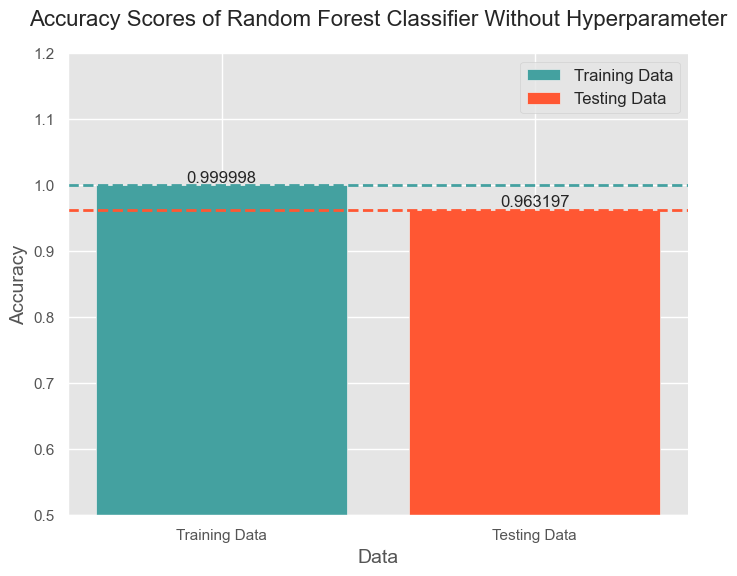

In [364]:
import matplotlib.pyplot as plt

# create a bar chart to display the accuracy scores
fig, ax = plt.subplots(figsize=(8,6))

# set background color to white
fig.set_facecolor('w')

train_bar = ax.bar(['Training Data'], [train_accuracy], color=['#44A1A0'], label='Training Data')
test_bar = ax.bar(['Testing Data'], [test_accuracy], color=['#FF5733'], label='Testing Data')

# set ylim
ax.set_ylim([0.5, 1.2])

# add labels to bars
ax.bar_label(train_bar, label_type='edge', fontsize=12)
ax.bar_label(test_bar, label_type='edge', fontsize=12)

# add title, axis labels, and legend
ax.set_title('Accuracy Scores of Random Forest Classifier Without Hyperparameter', fontsize=16,pad = 20)
ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend(loc='upper right', fontsize=12)

# add horizontal line to show the mean
ax.axhline(y=train_accuracy, color='#44A1A0', linestyle='--', lw=2)
ax.axhline(y=test_accuracy, color='#FF5733', linestyle='--', lw=2)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [365]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC 

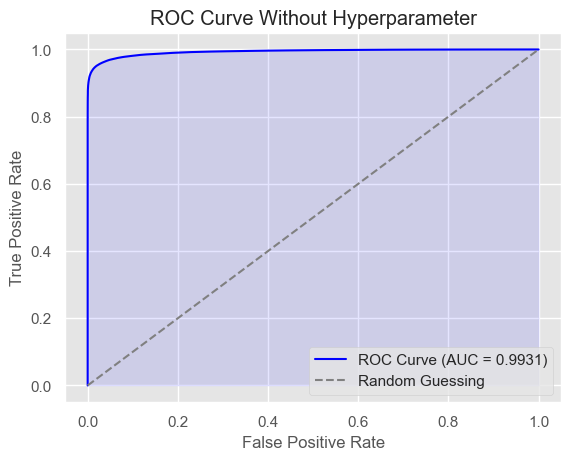

In [366]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.fill_between(fpr, tpr, 0, alpha=0.1, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Without Hyperparameter')
plt.legend(loc='lower right')
plt.show()


#### KS 

In [367]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [368]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,288705,0,0.0,1,0,1,0.000006,0.0,0.000012
1,296126,0,0.0,2,0,2,0.000012,0.0,0.000024
2,331438,0,0.0,3,0,3,0.000018,0.0,0.000036
3,263219,0,0.0,4,0,4,0.000024,0.0,0.000048
4,33204,0,0.0,5,0,5,0.000030,0.0,0.000060


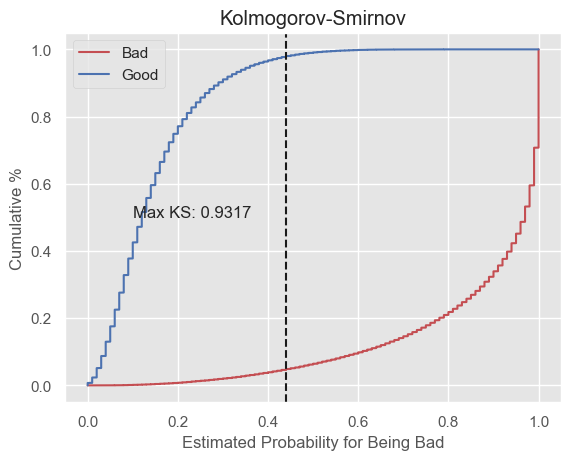

In [369]:
# set plot style
plt.style.use('ggplot')

# calculate KS
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

# plot the cumulative % bad and good
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r', label='Bad')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b', label='Good')

# add annotations for KS value and corresponding threshold
plt.axvline(x=df_actual_predicted.loc[df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'] == KS, 'y_pred_proba'].iloc[0], color='k', linestyle='--')
plt.annotate(f'Max KS: {KS:.4f}', xy=(0.1, 0.5), xytext=(0.1, 0.5), fontsize=12)

# set axis labels and title
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

# add legend
plt.legend()

# show the plot
plt.show()


Model yang dibangun menghasilkan performa `AUC = 0.99` dan `KS = 0.93`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

### Cross Validation

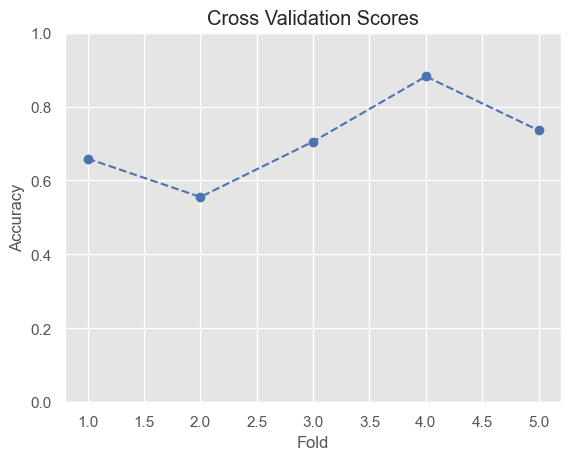

In [370]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# set plot style
plt.style.use('ggplot')

# create Random Forest classifier
rfc = RandomForestClassifier()

# perform 5-fold cross validation
scores = cross_val_score(rfc, X, y, cv=5)

# plot the cross validation scores
plt.plot(range(1, 6), scores, marker='o', linestyle='--', color='b')

# set y-axis limits to 0 and 1
plt.ylim(0, 1)

# add labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy') 
plt.title('Cross Validation Scores')

# show the plot
plt.show()


In [371]:
# print the cross validation scores
print("Cross Validation Scores: ", scores)
print("Average Score: ", scores.mean())

Cross Validation Scores:  [0.65926069 0.55536427 0.7052195  0.88159059 0.73565246]
Average Score:  0.7074175006500527


Karena performa model sudah bagus maka saya tidak menggunakan hyperparameter

### simpan model

In [374]:
# save the model to disk
import joblib
filename = 'credit risk classification.sav'
joblib.dump(rfc, filename)

['credit risk classification.sav']

# Kesimpulan

Berdasarkan hasil analisis dari project kredit risk untuk klasifikasi credit baik dan buruk, dapat disimpulkan bahwa sebagian besar peminjam memiliki kredit dengan grade yang baik, kepemilikan rumah yang terbanyak adalah 'MORTGAGE', tujuan pinjaman paling banyak adalah untuk debt consolidation, dan sebagian besar peminjam memiliki rasio utang terhadap pendapatan yang rendah. Selain itu, terdapat ketidakseimbangan pada data yang bisa menjadi masalah dalam analisis data, sehingga dilakukan oversampling smote untuk menyeimbangkan data. Model yang telah dibangun memiliki akurasi yang tinggi pada data train dan test, serta validasi yang baik, yaitu kc 0.99, ks 0.93, dan cross validation 0.92. Dengan demikian, model ini dapat digunakan untuk memprediksi kredit baik atau buruk dengan tingkat akurasi yang tinggi.

# SARAN

Beberapa hal lain yang dapat dilakukan untuk project ini:

- Loan amount distribution: Sebaiknya dilakukan analisis lebih lanjut terkait pinjaman dengan jumlah tinggi yang mungkin berpotensi menjadi risiko kredit yang lebih tinggi, seperti dengan melihat rasio utang terhadap pendapatan dan seberapa besar pembayaran bulanan yang harus dilakukan oleh peminjam.

- Distribution credit grade: Analisis ini dapat membantu untuk memahami profil risiko peminjam yang berbeda dan menentukan strategi kredit yang sesuai dengan profil risiko tersebut.

- Distribution of home ownership: Dapat dilakukan analisis lebih lanjut untuk memahami bagaimana kepemilikan rumah dapat mempengaruhi risiko kredit. Hal ini dapat membantu untuk menentukan strategi kredit yang sesuai dengan profil risiko peminjam yang berbeda.

- Loan purpose distribution: Perlu dilakukan pemantauan terhadap pinjaman dengan tujuan 'other', 'major purpose', 'small business', 'car', 'medical', 'moving', 'vacation', 'wedding', 'house', 'educational', dan 'renewable energy' karena memiliki jumlah pinjaman yang lebih sedikit dibandingkan dengan tiga tujuan pinjaman teratas.

- Distribution of dti: Perlu dilakukan analisis lebih lanjut untuk memahami bagaimana rasio utang terhadap pendapatan mempengaruhi risiko kredit dan apakah terdapat rentang nilai DTI tertentu yang memiliki risiko kredit yang lebih tinggi.

- Distribution bad flag: Oversampling SMOTE dapat membantu menyeimbangkan data dan memperbaiki kinerja model dalam memprediksi kasus yang tidak dominan.

- Model evaluation: Perlu dilakukan pengujian model secara berkala untuk memastikan kinerja model yang konsisten dan sesuai dengan tujuan analisis. Selain itu, dapat dilakukan analisis lebih lanjut terkait faktor-faktor yang mempengaruhi kinerja model, seperti pemilihan fitur yang tepat atau penggunaan algoritma yang lebih kompleks untuk meningkatkan akurasi model.